In [1]:
import nltk
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import re
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
my_paragraph = """
Books have always been my greatest passion since childhood. Reading transports me to different worlds, introducing me to diverse characters and fascinating ideas.
I particularly enjoy fantasy novels with their intricate world-building and imaginative storytelling elements.
The feeling of getting lost in a good book is unlike any other experience in life.
Libraries and bookstores feel like sacred spaces where countless adventures await on dusty shelves.
My collection grows steadily, and I find myself returning to old favorites while constantly discovering new authors to love.
"""

In [3]:
clean_text = my_paragraph.lower().translate(str.maketrans('', '', string.punctuation))

In [4]:
my_sentences = sent_tokenize(clean_text)
my_words = word_tokenize(clean_text)

print("Tokenized Sentences:\n", my_sentences)
print("\nTokenized Words:\n", my_words)

stop_words_list = set(stopwords.words('english'))
clean_words = [word for word in my_words if word not in stop_words_list]

print("\nFiltered Words (Stopwords Removed):\n", clean_words)

Tokenized Sentences:
 ['\nbooks have always been my greatest passion since childhood reading transports me to different worlds introducing me to diverse characters and fascinating ideas \ni particularly enjoy fantasy novels with their intricate worldbuilding and imaginative storytelling elements\nthe feeling of getting lost in a good book is unlike any other experience in life\nlibraries and bookstores feel like sacred spaces where countless adventures await on dusty shelves\nmy collection grows steadily and i find myself returning to old favorites while constantly discovering new authors to love']

Tokenized Words:
 ['books', 'have', 'always', 'been', 'my', 'greatest', 'passion', 'since', 'childhood', 'reading', 'transports', 'me', 'to', 'different', 'worlds', 'introducing', 'me', 'to', 'diverse', 'characters', 'and', 'fascinating', 'ideas', 'i', 'particularly', 'enjoy', 'fantasy', 'novels', 'with', 'their', 'intricate', 'worldbuilding', 'and', 'imaginative', 'storytelling', 'elements

In [5]:
word_freq = FreqDist(clean_words)

In [6]:
print("\nTop 10 Most Common Words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


Top 10 Most Common Words:
books: 1
always: 1
greatest: 1
passion: 1
since: 1
childhood: 1
reading: 1
transports: 1
different: 1
worlds: 1


<Axes: title={'center': 'Top 10 Word Frequencies (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

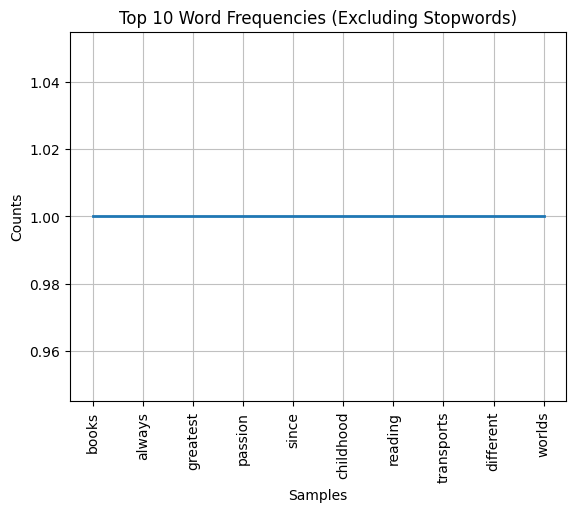

In [20]:
word_freq.plot(10, title="Top 10 Word Frequencies (Excluding Stopwords)")

In [8]:
processed_text = my_paragraph.lower().translate(str.maketrans('', '', string.punctuation))
word_list = word_tokenize(processed_text)
filtered_word_list = [word for word in word_list if word not in stop_words_list]

In [9]:
ps = PorterStemmer()
ls = LancasterStemmer()
wl = WordNetLemmatizer()

In [10]:
print(f"{'Original':<15}{'Porter Stem':<15}{'Lancaster Stem':<20}{'Lemmatized':<15}")
print("-" * 65)
for word in filtered_word_list:
    print(f"{word:<15}{ps.stem(word):<15}{ls.stem(word):<20}{wl.lemmatize(word):<15}")

Original       Porter Stem    Lancaster Stem      Lemmatized     
-----------------------------------------------------------------
books          book           book                book           
always         alway          alway               always         
greatest       greatest       greatest            greatest       
passion        passion        pass                passion        
since          sinc           sint                since          
childhood      childhood      child               childhood      
reading        read           read                reading        
transports     transport      transport           transport      
different      differ         diff                different      
worlds         world          world               world          
introducing    introduc       introduc            introducing    
diverse        divers         divers              diverse        
characters     charact        charact             character      
fascinatin

In [11]:
long_words = re.findall(r'\b[a-zA-Z]{6,}\b', my_paragraph)
print("Words with more than 5 letters:\n", long_words)

Words with more than 5 letters:
 ['always', 'greatest', 'passion', 'childhood', 'Reading', 'transports', 'different', 'worlds', 'introducing', 'diverse', 'characters', 'fascinating', 'particularly', 'fantasy', 'novels', 'intricate', 'building', 'imaginative', 'storytelling', 'elements', 'feeling', 'getting', 'unlike', 'experience', 'Libraries', 'bookstores', 'sacred', 'spaces', 'countless', 'adventures', 'shelves', 'collection', 'steadily', 'myself', 'returning', 'favorites', 'constantly', 'discovering', 'authors']


In [12]:
numeric_values = re.findall(r'\b\d+\b', my_paragraph)
print("\nNumbers in text:\n", numeric_values if numeric_values else "No numbers found.")


Numbers in text:
 No numbers found.


In [13]:
capital_words = re.findall(r'\b[A-Z][a-z]*\b', my_paragraph)
print("\nCapitalized words:\n", capital_words)


Capitalized words:
 ['Books', 'Reading', 'I', 'The', 'Libraries', 'My', 'I']


In [14]:
alpha_words = re.findall(r'\b[a-zA-Z]+\b', my_paragraph)
print("\nAlphabetic words:\n", alpha_words)


Alphabetic words:
 ['Books', 'have', 'always', 'been', 'my', 'greatest', 'passion', 'since', 'childhood', 'Reading', 'transports', 'me', 'to', 'different', 'worlds', 'introducing', 'me', 'to', 'diverse', 'characters', 'and', 'fascinating', 'ideas', 'I', 'particularly', 'enjoy', 'fantasy', 'novels', 'with', 'their', 'intricate', 'world', 'building', 'and', 'imaginative', 'storytelling', 'elements', 'The', 'feeling', 'of', 'getting', 'lost', 'in', 'a', 'good', 'book', 'is', 'unlike', 'any', 'other', 'experience', 'in', 'life', 'Libraries', 'and', 'bookstores', 'feel', 'like', 'sacred', 'spaces', 'where', 'countless', 'adventures', 'await', 'on', 'dusty', 'shelves', 'My', 'collection', 'grows', 'steadily', 'and', 'I', 'find', 'myself', 'returning', 'to', 'old', 'favorites', 'while', 'constantly', 'discovering', 'new', 'authors', 'to', 'love']


In [15]:
vowel_start_words = re.findall(r'\b[aeiouAEIOU][a-zA-Z]*\b', my_paragraph)
print("\nWords starting with a vowel:\n", vowel_start_words)


Words starting with a vowel:
 ['always', 'introducing', 'and', 'ideas', 'I', 'enjoy', 'intricate', 'and', 'imaginative', 'elements', 'of', 'in', 'a', 'is', 'unlike', 'any', 'other', 'experience', 'in', 'and', 'adventures', 'await', 'on', 'and', 'I', 'old', 'authors']


In [16]:
def my_tokenizer(text):
    pattern = r"""
        \b(?:\d+\.\d+|\d+)\b
        | \b\w+(?:-\w+)*\b
        | \b\w+'\w+\b
    """
    tokens = re.findall(pattern, text, re.VERBOSE)
    return tokens

In [17]:
def text_cleaner(text):
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', text)
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    text = re.sub(r'(\+?\d{1,3}[\s-])?\d{3}[-\s]?\d{3}[-\s]?\d{4}', '<PHONE>', text)
    return text

In [18]:
clean_paragraph = text_cleaner(my_paragraph)
custom_tokens = my_tokenizer(clean_paragraph)

print("Cleaned Text:\n", clean_paragraph)
print("\nCustom Tokens:\n", custom_tokens)

Cleaned Text:
 
Books have always been my greatest passion since childhood. Reading transports me to different worlds, introducing me to diverse characters and fascinating ideas. 
I particularly enjoy fantasy novels with their intricate world-building and imaginative storytelling elements.
The feeling of getting lost in a good book is unlike any other experience in life.
Libraries and bookstores feel like sacred spaces where countless adventures await on dusty shelves.
My collection grows steadily, and I find myself returning to old favorites while constantly discovering new authors to love.


Custom Tokens:
 ['Books', 'have', 'always', 'been', 'my', 'greatest', 'passion', 'since', 'childhood', 'Reading', 'transports', 'me', 'to', 'different', 'worlds', 'introducing', 'me', 'to', 'diverse', 'characters', 'and', 'fascinating', 'ideas', 'I', 'particularly', 'enjoy', 'fantasy', 'novels', 'with', 'their', 'intricate', 'world-building', 'and', 'imaginative', 'storytelling', 'elements', 'The